## Installing Tensorflow 2

In [1]:
# py -m pip install -U tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [8]:
tf.__version__, keras.__version__

('2.10.0', '2.10.0')

## Image Classifier

We are going to work with fashion MINIST

In [9]:
fashion_mnits = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnits.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

Creating a validation dataset, and scale the pixel intesities diving them by 255

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In fashion MNIST we need the list of class names to know what we are dealing with

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

Now it's time to create the model using the sequential API

In [14]:
model = keras.models.Sequential() # Sequential implies that the layers have to be added one by one
model.add(keras.layers.Flatten(input_shape=[28, 28])) # n inputs equal to number of features
model.add(keras.layers.Dense(300, activation="relu")) # First layer, with 300 neurons
model.add(keras.layers.Dense(100, activation="relu")) # Second layer, with 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) # Softmax because is a multiclass, and 10 neurons one per class

"We build the first layer and add it to the model. It is a Flatten layer whose
role is to convert each input image into a 1D array: if it receives input data X, it
computes X.reshape(-1, 1). This layer does not have any parameters; it is just
there to do some simple preprocessing. Since it is the first layer in the model, you
should specify the input_shape, which doesn’t include the batch size, only the
shape of the instances. Alternatively, you could add a keras.layers.InputLayer
as the first layer, setting input_shape=[28,28]."

Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. It also manages a vector
of bias terms (one per neuron).

Other way to create a sequential model is specifying the neurons inside the model

In [16]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In Output shape, the first element is None, that means the size of the batch

Note avery number of params is the last numbers of neurons plus the bias parameters (one per neuron) (Last Neurons * Current neurons) + One per current neurons bias parameter

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the connection weights
and the bias terms

In [19]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.07064635, -0.05387472,  0.05562678, ..., -0.03587768,
        -0.05028726, -0.03732417],
       [ 0.04496154,  0.03599848,  0.05570811, ..., -0.0265836 ,
        -0.0688344 , -0.02863748],
       [-0.01820023, -0.02965118,  0.04464071, ..., -0.06666005,
         0.03093608, -0.00933824],
       ...,
       [-0.0209837 ,  0.02819224, -0.04697947, ..., -0.0038941 ,
         0.02423908, -0.05529836],
       [ 0.03328946, -0.02601187,  0.01839277, ..., -0.0073881 ,
         0.02913884,  0.04237702],
       [ 0.00095125, -0.0282984 ,  0.03601219, ..., -0.03511011,
         0.01155376, -0.01519923]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

Thinh that the model has not been created yet, so, the last values are random

It's time to compile the model in order to specify the loss function and the optimizer to use

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

Now the model is ready to be trained

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7166 - accuracy: 0.7626 - val_loss: 0.5279 - val_accuracy: 0.8164
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4877 - accuracy: 0.8296 - val_loss: 0.4501 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4427 - accuracy: 0.8441 - val_loss: 0.4154 - val_accuracy: 0.8584
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4145 - accuracy: 0.8555 - val_loss: 0.4142 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3937 - accuracy: 0.8624 - val_loss: 0.3865 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8665 - val_loss: 0.3774 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3645 - accuracy: 0.8709 - val_loss: 0.3624 - val_accuracy:

If the training set was very skewed, with some classes being overrepresented and others
underrepresented, it would be useful to set the class_weight argument when
calling the fit() method, which would give a larger weight to underrepresented
classes and a lower weight to overrepresented classes.

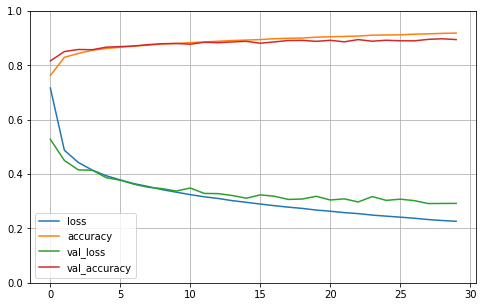

In [27]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

When plotting the training curve, it should be shifted by half an
epoch to the left.

Now it's time to evaluate the model

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.5304 - accuracy: 0.8414


[64.53044128417969, 0.8414000272750854]

If you want to predict with the model, the proccess is like the other algorithms

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 89ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Regression MLP

Now we are going to build a regression model using sequential API again.

Tha data set will be got of sklearn so, it's good moment to install it

In [ ]:
#pip install -U scikit-learn

The data set is californa housing (obviously 😒)

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Call data
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [3]:
# Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

The main diffences with classification task is that for regression we only need a single output neuron (If we want to predict a single value) and uses no activation function. And of course the loss function in mean square error

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.8954 - val_loss: 20.1964
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 1.0242 - val_loss: 0.5342
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4416 - val_loss: 0.4373
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3986 - val_loss: 0.4061
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3811 - val_loss: 0.3835
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3710 - val_loss: 0.3758
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3656 - val_loss: 0.3744
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3645 - val_loss: 0.3695
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3614 - val_loss: 0.3673
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3577 - val_loss: 0.364

In [7]:
y_pred

array([[3.6883545 ],
       [0.64430714],
       [1.0672438 ]], dtype=float32)

## Building Models using the Functional API

One example of a complex model is the Wide & Deep neural network. It connects all or part of the inputs directly to the output layer. "This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path)."

Let's build such neural network for california hpusing problems

In [8]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # Note that we are adding the last layer to this
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # and now we only need add the last layer
concat = keras.layers.Concatenate()([input_, hidden2]) # Here, in concat it's necessary add the input again, this is the trick
output = keras.layers.Dense(1)(concat) # But to the output only add the conat layer, recall output layer doesn't need activation function
model = keras.Model(inputs=[input_], outputs=[output])

The next steeps are equal like before

Everithing is good but do you remember we said that is possible send all or PART of the input? what if we want to send a part of other input to avoid overlapping?

In [18]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Note that there are two differents input so, when we need to fit the model we have to pass two inputs to the model

In [19]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                        validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.6079 - val_loss: 2.4401
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8046 - val_loss: 0.7348
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6727 - val_loss: 0.6983
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6242 - val_loss: 0.6405
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5907 - val_loss: 0.6186
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5634 - val_loss: 0.5941
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5408 - val_loss: 0.5623
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5229 - val_loss: 0.5477
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5069 - val_loss: 0.5374
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4931 - val_loss: 0.5388

In [20]:
y_pred

array([[3.2220306 ],
       [0.23647863],
       [1.4632845 ]], dtype=float32)

This type of models are too useful when you wnat to locate some object or person in a picture, and you can adding more outputs layers

## Using the Subclassing API to Build Dynamic Models

Subclassing API consist in create subclass the Model class, create layers you need in the constructor, and use them to perform the computations you want in the _call()_ method. For example, let's to create a WideAndDeepmodel() as the same the last model we created

In [3]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
        
model = WideAndDeepModel()

"This extra flexibility does come at a cost: your model’s architecture is hidden within
the call() method, so Keras cannot easily inspect it; it cannot save or clone it; and
when you call the summary() method, you only get a list of layers, without any information
on how they are connected to each other"

## Savind ans Restoring a Model

When it used the sequential API is very easy

In [ ]:
# Dont run
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")# HDF5 save everything abput the model (parameter, layers, weights and biases, etc)

And if you want to use it

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

If you don't want waiting until the end of the trainingyou can save checkpoints

In [ ]:
[...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

And if you use early stopping

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
                    
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

You can combine both callbacks to save checkpoints of your
model (in case your computer crashes) and interrupt training early when there is no
more progress (to avoid wasting time and resources)

## Using TensorBoard for visualization

This tool is useful for visualize the learning curves and other parameter of our model. For use it, we need to make a new directory, to save the files regard the training model, cause this output is a binary file.

In [10]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

And to train, let's to use one of the last models we built

In [11]:
run_logdir

'.\\my_logs\\run_2022_10_17-10_14_16'

In [12]:
# Call the data
fashion_mnits = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnits.load_data()


# Split in train, test and validations sets
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Model using the sequential api
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")
                                ])

# Compilation
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

Until there, all of this is like the last models, but in the fit it's neccessary to add one more step

In [13]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) # Assign this new feature
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb]) # And aggregate to the model

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7152 - accuracy: 0.7650 - val_loss: 0.4970 - val_accuracy: 0.8352
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4910 - accuracy: 0.8283 - val_loss: 0.4646 - val_accuracy: 0.8360
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4465 - accuracy: 0.8433 - val_loss: 0.4932 - val_accuracy: 0.8150
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4192 - accuracy: 0.8537 - val_loss: 0.4073 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3990 - accuracy: 0.8607 - val_loss: 0.3762 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3834 - accuracy: 0.8650 - val_loss: 0.3849 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3682 - accuracy: 0.8702 - val_loss: 0.3703 - val_accuracy:

Like a result we get adirectory structure similar to this one

In [17]:
os.getcwd()

'c:\\Users\\Brayam Pineda\\Documents\\Learning ANN\\Notebooks'

In [14]:
!tree

Listado de rutas de carpetas para el volumen OS
El n�mero de serie del volumen es 3C98-B899
C:.
+---my_logs
    +---run_2022_10_17-10_14_16
        +---train
        +---validation


Next you need to run this command in shell

In [ ]:
#tensorboard --logdir=./my_logs --port=6006

And access to http://localhost:6006/

If you want to see in jupyter, you could do ir by

In [35]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 35472), started 0:26:07 ago. (Use '!kill 35472' to kill it.)

If you wnat to kill the process in windows, you can to run

taskkill /IM "tensorboard.exe" /F

## Fine-Tuning Neural Network Hyperparameters

A first option is training by GridSearchCV or RandomizedSearchCV, but usually the second options is prefered doubt to the amount of hyperparameters.

To do it, it is necessary to construct a function that will build and compile a Keras model

In [7]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):

    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Now let's create a KerasRegressor based on this build_model( ) function

In [8]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\Brayam Pineda\AppData\Local\Temp\ipykernel_48400\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])

However, this proccess can during hours depending of the computational capacity

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

There are, other alternatives to explore this tuning. Those are based on zooming, a process that explore more a zone if this was good. Libraries which are useful are

- Hyperopt
- Hyperras, kopt or Talos
- Keras Tuner
- Scikit-Optimize (skopt)
- Spearmint
- Hyperband
- Sklearn-Deap